In [1]:
from CpSplineTransformer import CpSplineTransformer
from cuml.linear_model import LinearRegression
from cuml import train_test_split

import matplotlib.pyplot as plt
import cupy as cp
import cudf

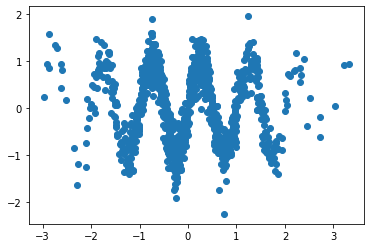

In [2]:
n_X = 1000
X = cp.random.normal(size=(n_X, 1))
e = cp.random.normal(0, 0.3, size=(n_X, 1))
y = cp.sin(2 * 3.14 * X) + e

plt.scatter(X.get(), y.get())

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
mySpline = CpSplineTransformer(degree=3, n_knots=30, extrapolation="constant")
reg = LinearRegression().fit(mySpline.fit_transform(X_train), y_train)

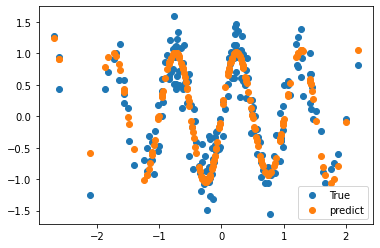

In [4]:
plt.scatter(X_test.get(), y_test.get(), label='True')
plt.scatter(X_test.get(), reg.predict(mySpline.transform(X_test)).get(), label='predict')
plt.legend()